# Taksit 

Selvitetään, onko ollut vaikutusta auton hintaan, jos auto on ollut aiemmin taksikäytössä. 



## CRISP-DM vaiheet 2 ja 3: Datan ymmärtäminen ja esikäsittely    

Tässä vaiheessa ladataan käytettävä CSV-aineisto, ja puhdistetaan ja muokataan se eheäksi ja tarkoituksenmukaiseksi myöhempää analyysi- ja mallinnusvaihetta varten. Aloitetaan lataamalla aineisto ja siitä tehtävän kannalta relevantit sarakkeet Ladataan aineistosta sarakkeet *'make_name'* (merkki), *'model_name'* (mallin nimi), *'mileage'* (mittarilukema), *'year'* (vuosimalli), *'price'* (myyntihinta), *'isCab'* (onko auto ollut taksikäytössä), *'daysonmarket'* (montako päivää auto oli myynnissä) ja *'has_accidents'* (onko auto joutunut onnettomuuteen) datakehikkoon *'df'*:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Tiedoston polku: 
file_path = '/Volumes/AIDA/AIDA-projekti/used_cars_data.csv' 

# Valitut sarakkeet:
sarakkeet = ['make_name', 'model_name', 'mileage', 'year', 'price', 'isCab', 'daysonmarket', 'has_accidents']

# Luetaan aineistosta vain halutut sarakkeet datakehikkoon:
df = pd.read_csv(file_path, usecols = sarakkeet) 

Tutkitaan saatua datakehikkoa.

In [3]:
df.sample(10)

,daysonmarket,has_accidents,isCab,make_name,mileage,model_name,price,year
2212523,69,NaN,NaN,Lincoln,0.0,Aviator,53465.0,2020
2168227,421,False,False,Chrysler,32503.0,Pacifica,27995.0,2018
1574704,210,NaN,NaN,Jeep,0.0,Grand Cherokee,28799.0,2020
682845,202,False,False,Lincoln,71.0,Corsair,43483.0,2020
62283,38,False,False,Lincoln,84291.0,MKZ Hybrid,13999.0,2014
2647614,79,False,True,Kia,17000.0,Optima,16997.0,2020
2626192,77,False,True,Chevrolet,37101.0,Malibu,16594.0,2018
1544392,28,False,False,Cadillac,134181.0,SRX,9995.0,2012
604857,6,False,True,Ford,39240.0,Fiesta,10900.0,2019
963173,43,NaN,NaN,Chevrolet,3.0,Silverado 1500,47246.0,2020


### Uuden sarakkeen luominen

Yhdistetään *'make_name'* ja *'model_name'* yhdeksi sarakkeeksi *'name'*, joka kuvaa auton merkkiä ja mallia:

In [4]:
df['name'] = df['make_name'] + " " + df['model_name']
df.head()

,daysonmarket,has_accidents,isCab,make_name,mileage,model_name,price,year,name
0,522,NaN,NaN,Jeep,7.0,Renegade,23141.0,2019,Jeep Renegade
1,207,NaN,NaN,Land Rover,8.0,Discovery Sport,46500.0,2020,Land Rover Discovery Sport
2,1233,False,False,Subaru,NaN,WRX STI,46995.0,2016,Subaru WRX STI
3,196,NaN,NaN,Land Rover,11.0,Discovery,67430.0,2020,Land Rover Discovery
4,137,NaN,NaN,Land Rover,7.0,Discovery Sport,48880.0,2020,Land Rover Discovery Sport


### Tyhjien arvojen käsittely

Tässä kysymyksessä on olennaista tietää, onko auto ollut taksikäytössä. Tutkitaan siis ensimmäiseksi, onko sarakkeessa *'isCab'* tyhjiä arvoja, ja poistetaan tarvittaessa tällaiset rivit. 

In [5]:
df['isCab'].unique()

array([nan, False, True], dtype=object)

In [6]:
# Tarkastetaan, montako tyhjää arvoa sarakkeessa 'isCab' on:
df['isCab'].isna().sum()

1426595

In [7]:
# Poistetaan sarakkeessa 'isCab' tyhjän arvon sisältävät rivit:
df.dropna(subset=['isCab'], inplace=True)

# Tarkastetaan uudelleen tyhjien arvojen määrät sarakkeittain:
df.isna().sum()

daysonmarket         0
has_accidents        0
isCab                0
make_name            0
mileage          19390
model_name           0
price                0
year                 0
name                 0
dtype: int64

Aineisto sisältää yhä tyhjiä arvoja sarakkeessa *'mileage'*. Sopivia keskilukuja näiden korvaamiseksi on vaikea päätellä, joten poistetaan myös nämä rivit.

In [8]:
df.dropna(subset=['mileage'], inplace=True)

df.isna().sum()

daysonmarket     0
has_accidents    0
isCab            0
make_name        0
mileage          0
model_name       0
price            0
year             0
name             0
dtype: int64

### Tietotyyppien tarkastelu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1554055 entries, 5 to 3000039
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   daysonmarket   1554055 non-null  int64  
 1   has_accidents  1554055 non-null  object 
 2   isCab          1554055 non-null  object 
 3   make_name      1554055 non-null  object 
 4   mileage        1554055 non-null  float64
 5   model_name     1554055 non-null  object 
 6   price          1554055 non-null  float64
 7   year           1554055 non-null  int64  
 8   name           1554055 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 118.6+ MB


Aineistossa on yhä liki 1,6 miljoonaa riviä, kun siitä on poistettu tyhjiä arvoja sisältävät rivit.   

Muutetaan seuraavaksi *'object'*-tyypin sarakkeiden *'has_accidents'* ja *'isCab'* tietotyypiksi *'Boolean'*:

In [10]:
df['isCab'].unique()

array([False, True], dtype=object)

In [11]:
df['isCab'].unique()

array([False, True], dtype=object)

In [12]:
df['has_accidents'] = df['has_accidents'].astype(bool)
df['isCab'] = df['isCab'].astype(bool)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1554055 entries, 5 to 3000039
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   daysonmarket   1554055 non-null  int64  
 1   has_accidents  1554055 non-null  bool   
 2   isCab          1554055 non-null  bool   
 3   make_name      1554055 non-null  object 
 4   mileage        1554055 non-null  float64
 5   model_name     1554055 non-null  object 
 6   price          1554055 non-null  float64
 7   year           1554055 non-null  int64  
 8   name           1554055 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 97.8+ MB


### Identtisten rivien poisto 

Jos datassa on identtisiä rivejä, poistetaan ne.

In [14]:
df1 = df.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551707 entries, 5 to 3000039
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   daysonmarket   1551707 non-null  int64  
 1   has_accidents  1551707 non-null  bool   
 2   isCab          1551707 non-null  bool   
 3   make_name      1551707 non-null  object 
 4   mileage        1551707 non-null  float64
 5   model_name     1551707 non-null  object 
 6   price          1551707 non-null  float64
 7   year           1551707 non-null  int64  
 8   name           1551707 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 97.7+ MB


In [15]:
df = df1
df.head()

,daysonmarket,has_accidents,isCab,make_name,mileage,model_name,price,year,name
5,242,False,False,Land Rover,12.0,Range Rover Velar,66903.0,2020,Land Rover Range Rover Velar
9,510,False,False,Land Rover,254.0,Range Rover Evoque,84399.0,2020,Land Rover Range Rover Evoque
10,1252,False,False,Alfa Romeo,301.0,4C,97579.0,2015,Alfa Romeo 4C
12,1233,False,False,BMW,6903.0,3 Series,58995.0,2016,BMW 3 Series
36,33,False,False,Hyundai,30707.0,Elantra,13324.0,2017,Hyundai Elantra


### Aineiston rajaaminen 

Katsotaan ensin, kuinka moni aineiston autoista on ollut taksi- ja ei-taksikäytössä:

In [16]:
df['isCab'].value_counts()

isCab
False    1265950
True      285757
Name: count, dtype: int64

Tässä tehtävässä ollaan kiinnostuneita vain niistä automalleista, joita on käytetty sekä takseina että ei-takseina. Rajataan aineistoa siten, että se kattaa vain ne automallit (*'name'*), jotka ovat olleet sekä taksikäytössä että ei-taksikäytössä.    

Aloitetaan tallentamalla uniikit automallit muuttujaan *'uniikit_autot'*, ja käydään sitä läpi malli kerrallaan. Tarkastetaan, onko kyseinen automalli ollut sekä taksi- että ei-taksikäytössä, ja tallennetaan tällaiset automallit listaan *'autolista'*:

In [17]:
uniikit_autot = df['name'].unique() 

autolista = []

for malli in uniikit_autot:
    taksi = df[(df['name'] == malli) & (df['isCab'] == True)]
    eitaksi = df[(df['name'] == malli) & (df['isCab'] == False)]

    if len(taksi) > 0 and len(eitaksi) > 0:
        autolista.append(malli)

In [18]:
len(autolista)

578

In [19]:
df['name'].nunique()

1426

Sopivia automalleja on 578, kun niitä datakehikossa *'df'* on kaikkiaan 1426. Suodatetaan datakehikkoa siten, että vain *'autolista'*:n mukaiset mallit ovat mukana:

In [20]:
autot_df = df[df['name'].isin(autolista)]

In [21]:
autot_df.head()

,daysonmarket,has_accidents,isCab,make_name,mileage,model_name,price,year,name
5,242,False,False,Land Rover,12.0,Range Rover Velar,66903.0,2020,Land Rover Range Rover Velar
9,510,False,False,Land Rover,254.0,Range Rover Evoque,84399.0,2020,Land Rover Range Rover Evoque
12,1233,False,False,BMW,6903.0,3 Series,58995.0,2016,BMW 3 Series
36,33,False,False,Hyundai,30707.0,Elantra,13324.0,2017,Hyundai Elantra
38,55,False,True,Chevrolet,42394.0,Malibu,14639.0,2018,Chevrolet Malibu


In [22]:
autot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494497 entries, 5 to 3000039
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   daysonmarket   1494497 non-null  int64  
 1   has_accidents  1494497 non-null  bool   
 2   isCab          1494497 non-null  bool   
 3   make_name      1494497 non-null  object 
 4   mileage        1494497 non-null  float64
 5   model_name     1494497 non-null  object 
 6   price          1494497 non-null  float64
 7   year           1494497 non-null  int64  
 8   name           1494497 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 94.1+ MB


Muutetaan vielä boolean-tietotyypin sarakkeet *'has_accidents'* ja *'isCab'* numeerisiksi koneoppimismalleja varten:

In [23]:
autot_df.loc[:, 'has_accidents'] = autot_df['has_accidents'].astype(int)
autot_df.loc[:, 'isCab'] = autot_df['isCab'].astype(int)

In [24]:
autot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494497 entries, 5 to 3000039
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   daysonmarket   1494497 non-null  int64  
 1   has_accidents  1494497 non-null  int64  
 2   isCab          1494497 non-null  int64  
 3   make_name      1494497 non-null  object 
 4   mileage        1494497 non-null  float64
 5   model_name     1494497 non-null  object 
 6   price          1494497 non-null  float64
 7   year           1494497 non-null  int64  
 8   name           1494497 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 114.0+ MB


Aineistossa on mukana nyt noin 1,5 miljoonaa datariviä, eli suunnilleen puolet alkuperäisestä aineistosta. 

Tutkitaan seuraavaksi, kuinka suuri osuus eri automallien autoista on ollut aiemmin taksikäytössä. Muodostetaan tätä varten sarake *'cabRatio'*. Lasketaan samalla kuinka monta myytyä autoa kyseistä automallia on aineistossa kaikkiaan (*'count'*).

In [26]:
# Ryhmitellään mallin ('name') perusteella, ja lasketaan autojen lukumäärät ('count') sekä 'cabRatio':
tulos_df = autot_df.groupby(['name']).agg(
    cabRatio = ('isCab', 'mean'),
    count = ('price', 'count')
)

# Järjestetään rivit nousevaan järjestykseen 'cabRatio' perusteella:
tulos_df.sort_values('cabRatio', inplace = True)

# Pyöristetään sarakkeen 'isCabRatio' tulokset kolmen desimaalin tarkkuuteen:
tulos_df['cabRatio'] = tulos_df['cabRatio'].round(3)

print("Suurin taksien osuus: \n", tulos_df.head(10))
print("\n\nPienin taksien osuus: \n", tulos_df.tail(10))

Suurin taksien osuus: 
                        cabRatio  count
name                                  
Honda Civic Coupe         0.000   2938
Acura TLX                 0.000   2816
Acura MDX                 0.000   5534
Lexus NX 200t             0.001   1992
Honda Civic Hatchback     0.001   1835
Lexus IS                  0.001   1832
Honda Ridgeline           0.001   1204
Lexus RX 350              0.001   6087
GMC Sierra 3500HD         0.001    807
Scion tC                  0.001    756


Pienin taksien osuus: 
                           cabRatio  count
name                                     
Ford Fusion Hybrid           0.608   6159
Cadillac XT4                 0.612   1067
Chrysler Voyager             0.667    117
Oldsmobile Ciera             0.667      3
Dodge Grand Caravan          0.711  16427
Chevrolet Express            0.712   3117
Mitsubishi Eclipse Cross     0.718   1167
Chevrolet Impala Limited     0.803    686
Chevrolet Classic            0.942     52
Chevrolet Captiva Sp

<Axes: xlabel='name'>

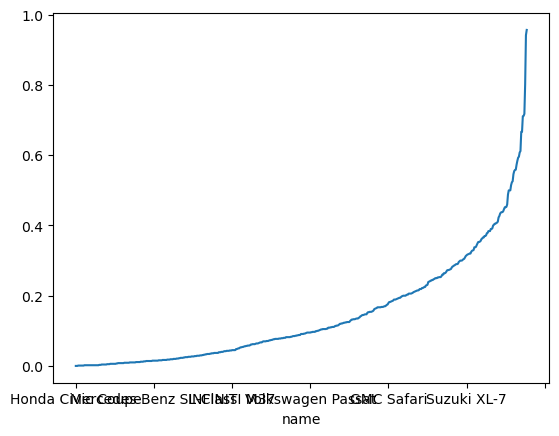

In [27]:
tulos_df['cabRatio'].plot()

Tuloksista nähdään, että aiemmin taksikäytössä olleiden autojen osuus vaihtelee automalleittain suuresti. Suurin taksien osuus myydyistä autoista (*'cabRatio'*) on malleilla *Chevrolet Captiva Sport* (96 %), *Chevrolet Classic* (94 %) ja *Chevrolet Impala Limited* (80 %) mallien autoja, kun taas pienin takseina toimineiden autojen osuus on malleilla *Honda Civic Coupe* (0 %), *Acura TLX* (0 %) ja *Acura MDX* (0 %).   

Jotta hintaeroa taksikäytössä olleiden ja ei-taksien välillä voidaan tarkastella, suodatetaan aineistosta mukaan vain sellaiset automallit, joiden myytyjen autojen kokonaismäärästä on ollut taksikäytössä vähintään 20 prosenttia ja enintään 80 prosenttia. Jotta mukaan ei satu harvinaisia yksittäistarpauksia, rajataan mukana pidettäviä automalleja vielä siten, että kyseistä automallia on pitänyt olla myynnissä yhteensä vähintään 100 kappaletta. 

<Axes: xlabel='name'>

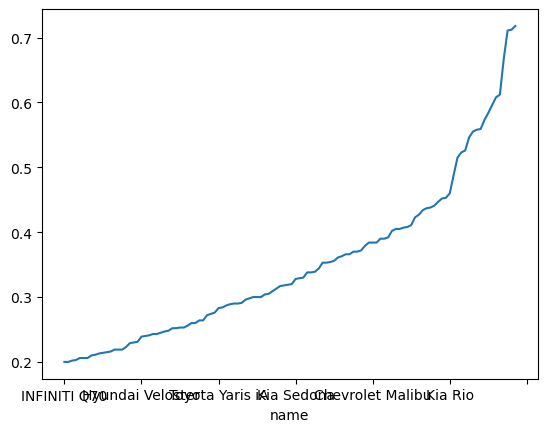

In [32]:
autot2 = tulos_df.loc[(tulos_df['cabRatio'] >= 0.2) & (tulos_df['cabRatio'] <= 0.8) & (tulos_df['count'] >= 100)]
autot2['cabRatio'].plot()

In [45]:
# Resetoidaan indeksi, jotta 'name' saadaan indeksistä sarakkeeksi:
autot2 = autot2.reset_index()

In [52]:
sopivat_autot = autot2['name']
sopivat_autot

0                  INFINITI Q70
1           Ford Crown Victoria
2                    GMC Acadia
3         Chevrolet Trailblazer
4                   Kia Spectra
                 ...           
113                Cadillac XT4
114            Chrysler Voyager
115         Dodge Grand Caravan
116           Chevrolet Express
117    Mitsubishi Eclipse Cross
Name: name, Length: 118, dtype: object

Lopputuloksena saatiin 118 erilaista automallia, joita on myyty vähintään 100 kappaletta, ja joista 20-80 prosenttia on ollut aiemmin taksikäytössä. Tallennetaan aineisto datakehikkoon *'taksit'*, ja käytetään näitä automalleja myöhemmin analyysissä.

In [56]:
taksit_df = autot_df[autot_df['name'].isin(sopivat_autot)]
    
taksit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598588 entries, 5 to 3000039
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daysonmarket   598588 non-null  int64  
 1   has_accidents  598588 non-null  int64  
 2   isCab          598588 non-null  int64  
 3   make_name      598588 non-null  object 
 4   mileage        598588 non-null  float64
 5   model_name     598588 non-null  object 
 6   price          598588 non-null  float64
 7   year           598588 non-null  int64  
 8   name           598588 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 45.7+ MB


Analysoitavaan aineistoon jää myyntitiedot 600000 autosta, eli noin 20 prosenttia alkuperäisestä aineistosta. Tallennetaan data tiedostoon *'taksit.csv'*:

In [57]:
taksit_df.to_csv('taksit.csv', index = False)

### Datan kuvailu 

Luetaan aiemmin tallennettu csv-tiedosto *'taksit.csv'* datakehikkoon *'df'*, ja tutustutaan siihen tarkemmin tilastollisten tunnuslukujen avulla. 

In [81]:
taksit_df = pd.read_csv('taksit.csv')

taksit_df.describe()

,daysonmarket,has_accidents,isCab,mileage,price,year
count,598588.000000,598588.000000,598588.000000,598588.000000,5.985880e+05,598588.000000
mean,57.598370,0.157033,0.343822,54423.963466,1.934238e+04,2016.258448
std,96.963631,0.363832,0.474983,43402.601522,1.217399e+04,3.818566
min,0.000000,0.000000,0.000000,0.000000,1.650000e+02,1947.000000
25%,13.000000,0.000000,0.000000,25467.000000,1.278875e+04,2015.000000
50%,30.000000,0.000000,0.000000,39263.000000,1.749000e+04,2017.000000
75%,60.000000,0.000000,1.000000,76056.250000,2.348100e+04,2019.000000
max,3599.000000,1.000000,1.000000,398654.000000,2.698500e+06,2021.000000


Keskimääräinen myyntiaika autoilla on noin 58 vuorokautta, mutta myyntiajan vaihteluväli on 0-3599 vuorokautta, ja keskihajonta 97 vuorokautta. 50 prosenttia autoista on myyty 30 vuorokaudessa ja 75 proenttia autoista on myynnissä korkeintaan 60 vuorokautta, mutta joku tai jokunen erittäin pitkään myytävänä ollut auto nostaa keskiarvon verrattain korkeaksi.   

Mittarilukeman keskiarvo on noin 54 000 mailia, ja vaihteluväli nollasta liki neljäänsataan tuhanteen mailiin. Keskihajonta on 43 000, 50 %:n kvartiili 39 000 ja 75 %:n 76 000.    

Myyntihinnan keskiarvo on noin 1900 dollaria vaihteluvälin ollessa 165-2698500 dollaria. Keskiharjonta on 12173 dollaria, 50 %:n kvartiili 17490 dollaria ja 75 %:n kvartiili 23481 dollaria.   

Autojen vuosimallien keskiarvo on 2016, ja vaihteluväli 1947-2021. Keskiharjonta on 3.8, 50 %:n kvartiili 2017 ja 75 % kvartiili 2019. Valtaosa autoista (75 %) on siis korkeintaan vuoden 2019 vuosimallia.   

Edellisten jakaumia taksien ja ei-taksien välillä havainnollistavat seuraavat boxplot-kaaviot:  

**Myyntiaika**

<Axes: xlabel='isCab', ylabel='daysonmarket'>

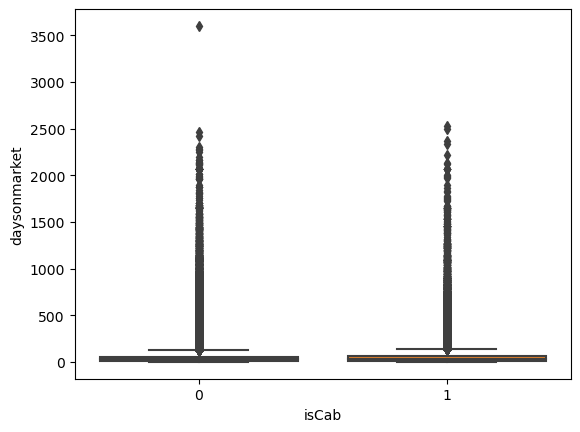

In [82]:
sns.boxplot(x = 'isCab', y = 'daysonmarket', data = taksit_df)

**Mittarilukema**

<Axes: xlabel='isCab', ylabel='mileage'>

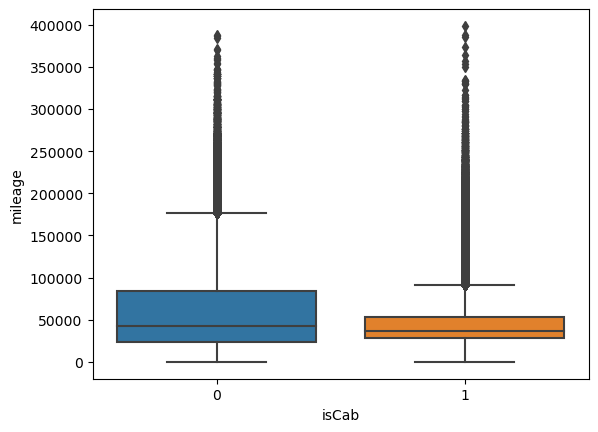

In [83]:
sns.boxplot(x = 'isCab', y = 'mileage', data = taksit_df)

**Hinta**

<Axes: xlabel='isCab', ylabel='price'>

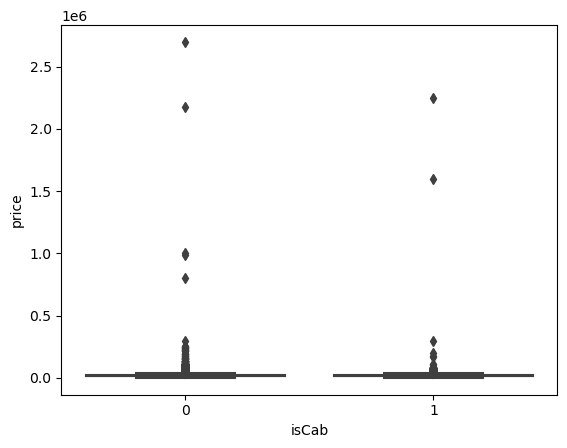

In [84]:
sns.boxplot(x = 'isCab', y = 'price', data = taksit_df)

**Vuosimalli**

<Axes: xlabel='isCab', ylabel='year'>

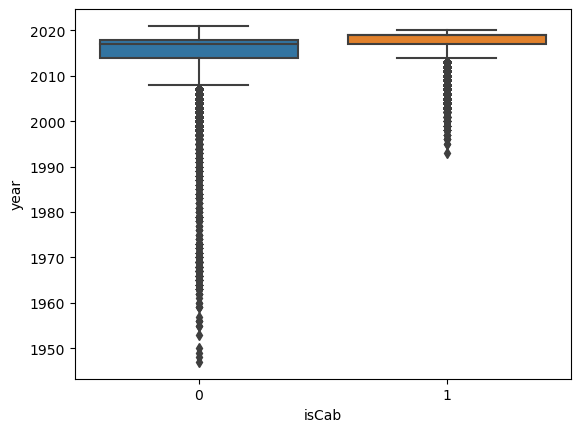

In [85]:
sns.boxplot(x = 'isCab', y = 'year', data = taksit_df)

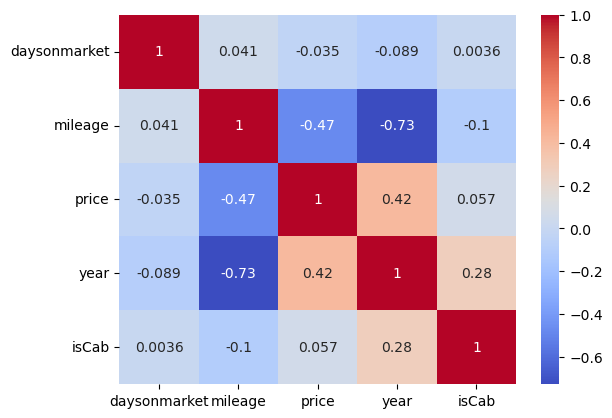

In [86]:
# Korrelaatiomatriisi sarakkeista 'mileage', 'year', ja 'price':
correlation_matrix = taksit_df[['daysonmarket', 'mileage', 'price', 'year', 'isCab']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='year,isCab'>

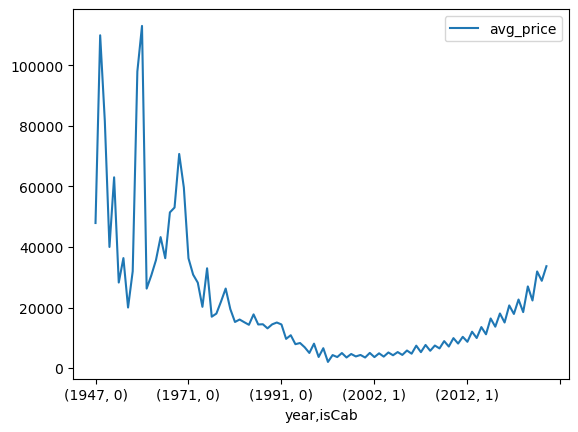

In [87]:
hinta_vuosi_taksi = taksit_df.groupby(['year', 'isCab']).agg(
    avg_price = ('price', 'mean')
)

hinta_vuosi_taksi.plot()

## Koulutus- ja testiaineistoon jako ja datan skaalaus

Määritellään X- ja y-muuttujat, jaetaan data koulutus- ja testiaineistoon ja skaalataan data:

In [88]:
from sklearn.preprocessing import LabelEncoder 

# Enkoodataan 'name' sarakkeen arvot: 
le = LabelEncoder() 

taksit_df['namelabel'] = le.fit_transform(taksit_df['name'])
#taksit_df['name'].unique()

In [92]:
#  Määritellään X- ja y-muuttujat: 
X = taksit_df.drop(['price', 'make_name', 'model_name', 'name'], axis = 1)
y = taksit_df['price']

print(X.columns)

Index(['daysonmarket', 'has_accidents', 'isCab', 'mileage', 'year',
       'namelabel'],
      dtype='object')


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [94]:
# Jaetaan aineisto opetus- ja testausaineistoksi:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Skaalataan arvot:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## CRISP-DM vaihe 4: Mallinnus

### Lineaarinen regressiomalli

Käytetään mallintamiseen lineaarista regressiomallia, jossa hintaa selitetään kaikilla aineistoon valituilla muuttujilla *'daysonmarket'*, *'has_accidents'*, *'isCab'*, *'mileage'* ja *'year'*. Mallin avulla saadaan selville, millainen vaikutus näillä tekijöillä on auton myyntihintaan.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
# Luodaan lineaarisen regression objekti:
regr = linear_model.LinearRegression()

# Sovitetaan malli opetusaineistoon:
regr.fit(X_train, y_train)

# Ennustetaan testiaineiston arvoja:
y_pred = regr.predict(X_test)

In [96]:
# Kertoimet:
print("Kertoimet: \n", regr.coef_)

# Keskihajonta:
print("\nKeskihajonta: %.2f" % mean_squared_error(y_test, y_pred))

# Selitysaste:
print("\nSelitysaste (Rˆ2): %.2f" % r2_score(y_test, y_pred))


Kertoimet: 
 [ -144.66452076  -609.36226187  -381.68621729 -4338.54858503
  2016.75800373 -1851.30589271]

Keskihajonta: 137003133.98

Selitysaste (Rˆ2): 0.22


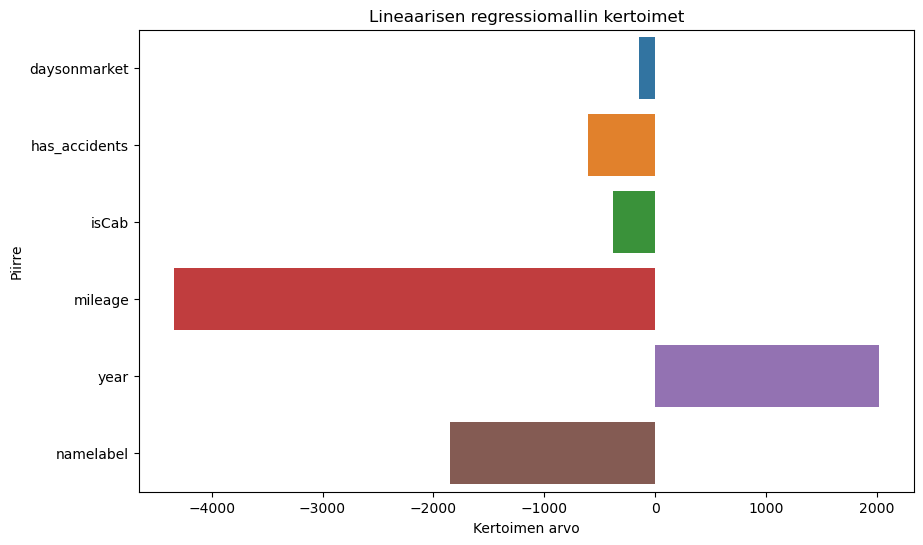

In [97]:
kertoimet = pd.DataFrame({
    'Piirre': ['daysonmarket', 'has_accidents', 'isCab', 'mileage', 'year', 'namelabel'],
    'Kerroin': regr.coef_
})

# Kaavio kertoimista:
plt.figure(figsize=(10, 6))
sns.barplot(x='Kerroin', y='Piirre', data=kertoimet, orient='h')
plt.title('Lineaarisen regressiomallin kertoimet')
plt.xlabel('Kertoimen arvo')
plt.ylabel('Piirre')

plt.show()

Tutkitaan, minkälainen vaikutus auton hintaan on sillä, että auton on ollut taksikäytössä:

In [98]:
#  Määritellään X- ja y-muuttujat: 
X2 = taksit_df['isCab'].values.reshape(-1, 1)
y2 = taksit_df['price']

# Jaetaan aineisto:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [99]:
# Lineaarisen regressiomallin objekti:
regr2 = linear_model.LinearRegression()

# Sovitetaan malli opetusaineistoon:
regr2.fit(X2_train, y2_train)

# Ennustetaan testiaineiston arvoja:
y2_pred = regr2.predict(X2_test)

In [100]:
# Kertoimet:
print("Kertoimet: \n", regr2.coef_)

# Keskihajonta:
print("\nKeskihajonta: %.2f" % mean_squared_error(y2_test, y2_pred))

# Selitysaste:
print("\nSelitysaste (Rˆ2): %.2f" % r2_score(y2_test, y2_pred))


Kertoimet: 
 [1450.29659087]

Keskihajonta: 175107594.30

Selitysaste (Rˆ2): 0.00


Kokeiltujen regressiomallien selitysasteet (Rˆ2) jäävät niin alhaisiksi (0.22 ja 0.00), ettei mallin piirteiden voida katsoa selittävän hintaa käytännössä lainkaan. Tulos tuntuu epäuskottavalta, joten syytä mallin heikkouteen kannattaa etsiä aineistosta. Aiemmin tarkastelluista jakaumakaavioista ja tilastollisista tunnusluvuista voidaan päätellä, että yksittäiset liian suuret tai pienet havainnot sotkevat regressioanalyysiä. Voi olla tarpeen myös tarkastella huolellisemmin, mitkä automallit kannattaa ottaa mukaan analyysiin.     

## CRISP-DM vaihe 3: Datan esikäsittely

Palataan takaisin datan esikäsittelyyn, ja rajataan aineistoa tarkemmin. Aloitetaan rajaamalla myyntiaika vuoteen, toisin sanoen 365 vuorokauteen. Tällä pääsemme eroon kohtuuttoman pitkän myyntiajan autoista (max. 3599 vuorokautta, eli noin 10 vuotta). Rajataan autoja myös vuosimallin perusteella siten, että poistetaan aineistosta autot, jotka ovat vanhempaa vuosimallia kuin 1995. Poistetaan myös kolaroidut autot, ts. rivit, joissa *'has_accident'* saa arvon 1.

In [101]:
taksit_df.head()

,daysonmarket,has_accidents,isCab,make_name,mileage,model_name,price,year,name,namelabel
0,242,0,0,Land Rover,12.0,Range Rover Velar,66903.0,2020,Land Rover Range Rover Velar,79
1,33,0,0,Hyundai,30707.0,Elantra,13324.0,2017,Hyundai Elantra,54
2,55,0,1,Chevrolet,42394.0,Malibu,14639.0,2018,Chevrolet Malibu,18
3,27,0,0,Chevrolet,36410.0,Traverse,23723.0,2018,Chevrolet Traverse,23
4,27,1,0,Chevrolet,36055.0,Traverse,22422.0,2017,Chevrolet Traverse,23


In [102]:
taksit2_df = taksit_df[(taksit_df['daysonmarket'] <= 365) & (taksit_df['year'] >= 1995) & (taksit_df['has_accidents'] == 0)] 

Tarkastetaan, että näiden rajausten jälkeen aineistoon ei ole jäänyt automalleja, joissa taksien osuus on liian suuri tai pieni (ts. yli 80 tai alle 20 prosenttia), tai niitä on myyty lukumäärällisesti liian vähän (alle 100 kpl). 

In [103]:
# Ryhmitellään mallin ('name') perusteella, ja lasketaan autojen lukumäärät ('count') sekä 'cabRatio':
tulos4_df = taksit2_df.groupby(['name']).agg(
    cabRatio = ('isCab', 'mean'),
    count = ('price', 'count')
)

# Järjestetään rivit nousevaan järjestykseen 'cabRatio' perusteella:
tulos4_df.sort_values('cabRatio', inplace = True)

# Pyöristetään sarakkeen 'isCabRatio' tulokset kolmen desimaalin tarkkuuteen:
tulos4_df['cabRatio'] = tulos4_df['cabRatio'].round(3)

print("Pienin taksien osuus: \n", tulos4_df.head(10))
print("\nSuurin taksien osuus: \n", tulos4_df.tail(10))

Pienin taksien osuus: 
                         cabRatio  count
name                                   
INFINITI Q70               0.172    163
Ford Focus                 0.186   8136
Chevrolet Trailblazer      0.188    666
Chevrolet Traverse         0.206  10697
Ford Edge                  0.207  15502
Buick Rendezvous           0.209    110
Hyundai Santa Fe Sport     0.210   3958
Ford Fusion                0.210  18319
GMC Acadia                 0.215   9708
Saturn Outlook             0.219    114

Suurin taksien osuus: 
                           cabRatio  count
name                                     
Mitsubishi Outlander         0.583   2862
Ford Transit Passenger       0.590   2435
Chevrolet Impala             0.598   6457
Lincoln MKT                  0.603    677
Ford Fusion Hybrid           0.612   5564
Cadillac XT4                 0.636   1010
Chrysler Voyager             0.663    101
Dodge Grand Caravan          0.732  13968
Chevrolet Express            0.743   2668
Mitsubish

Aineiston rajaamisen jälkeen taksien osuus jää alle 20 prosenttiin mall3illa *INFINITI Q70*, *Ford Focus* ja *Chevrolet Trailblazer* (cabRatio: 0.195, count: 200). Poistetaan nämä autot aineistosta.

In [104]:
taksit2_df = taksit2_df[(taksit2_df['name'] != 'INFINITI Q70') | (taksit2_df['name'] != 'Ford Focus') | (taksit2_df['name'] != 'Chevrolet Trailblazer')] 
#taksit2_df['name'].unique()

Tarkastellaan, miltä aineisto vaikuttaa nyt:

In [105]:
taksit2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495789 entries, 0 to 598587
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daysonmarket   495789 non-null  int64  
 1   has_accidents  495789 non-null  int64  
 2   isCab          495789 non-null  int64  
 3   make_name      495789 non-null  object 
 4   mileage        495789 non-null  float64
 5   model_name     495789 non-null  object 
 6   price          495789 non-null  float64
 7   year           495789 non-null  int64  
 8   name           495789 non-null  object 
 9   namelabel      495789 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 41.6+ MB


In [106]:
taksit2_df.describe()

,daysonmarket,has_accidents,isCab,mileage,price,year,namelabel
count,495789.000000,495789.0,495789.000000,495789.000000,4.957890e+05,495789.000000,495789.000000
mean,47.315608,0.0,0.355556,50037.808570,2.019605e+04,2016.671624,59.586391
std,57.192034,0.0,0.478682,40658.547296,1.240519e+04,3.302812,31.727899
min,0.000000,0.0,0.000000,0.000000,1.650000e+02,1995.000000,0.000000
25%,13.000000,0.0,0.000000,23827.000000,1.375900e+04,2016.000000,36.000000
50%,29.000000,0.0,0.000000,37013.000000,1.799700e+04,2017.000000,54.000000
75%,56.000000,0.0,1.000000,66867.000000,2.415400e+04,2019.000000,94.000000
max,365.000000,0.0,1.000000,387347.000000,2.698500e+06,2021.000000,117.000000


<Axes: xlabel='isCab', ylabel='daysonmarket'>

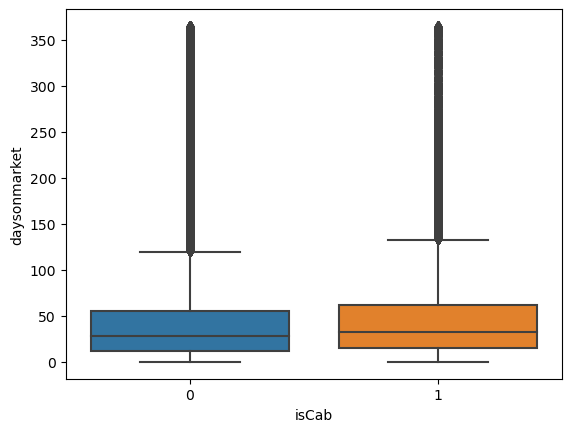

In [107]:
sns.boxplot(x = 'isCab', y = 'daysonmarket', data = taksit2_df)

<Axes: xlabel='isCab', ylabel='mileage'>

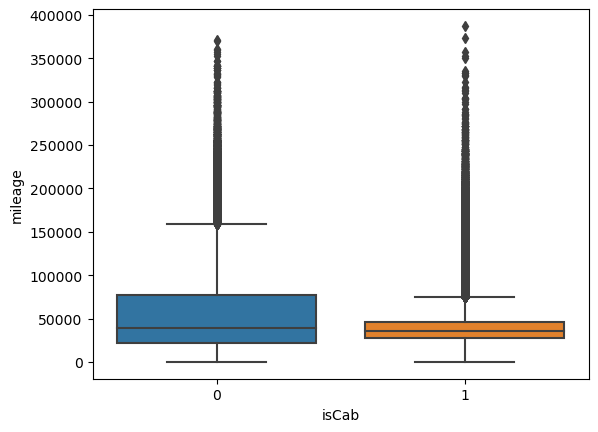

In [108]:
sns.boxplot(x = 'isCab', y = 'mileage', data = taksit2_df)

<Axes: xlabel='isCab', ylabel='year'>

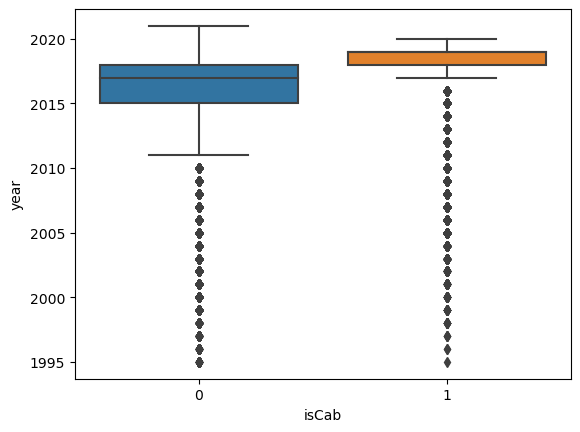

In [109]:
sns.boxplot(x = 'isCab', y = 'year', data = taksit2_df)

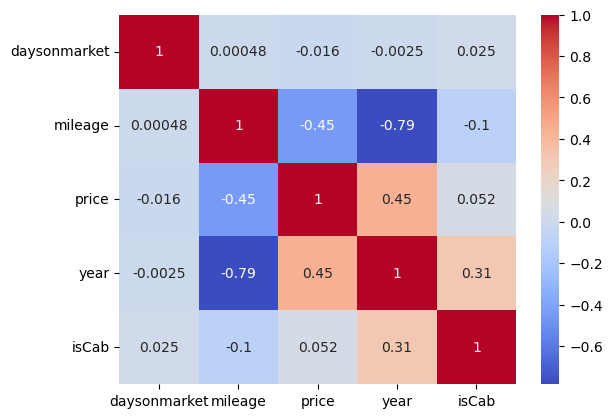

In [110]:
# Korrelaatiomatriisi sarakkeista 'mileage', 'year', ja 'price':
correlation_matrix = taksit2_df[['daysonmarket', 'mileage', 'price', 'year', 'isCab']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Katsotaan vielä visuaalisesti, millä aineiston automalleilla on suurin 'cabRatio', eli mistä malleista suurin osa on ollut taksikäytössä:

In [111]:
tulos5_df = tulos4_df.tail(15)
tulos5_df.reset_index().sort_values('cabRatio', ascending = False)

,name,cabRatio,count
14,Mitsubishi Eclipse Cross,0.751,1068
13,Chevrolet Express,0.743,2668
12,Dodge Grand Caravan,0.732,13968
11,Chrysler Voyager,0.663,101
10,Cadillac XT4,0.636,1010
9,Ford Fusion Hybrid,0.612,5564
8,Lincoln MKT,0.603,677
7,Chevrolet Impala,0.598,6457
6,Ford Transit Passenger,0.590,2435
5,Mitsubishi Outlander,0.583,2862


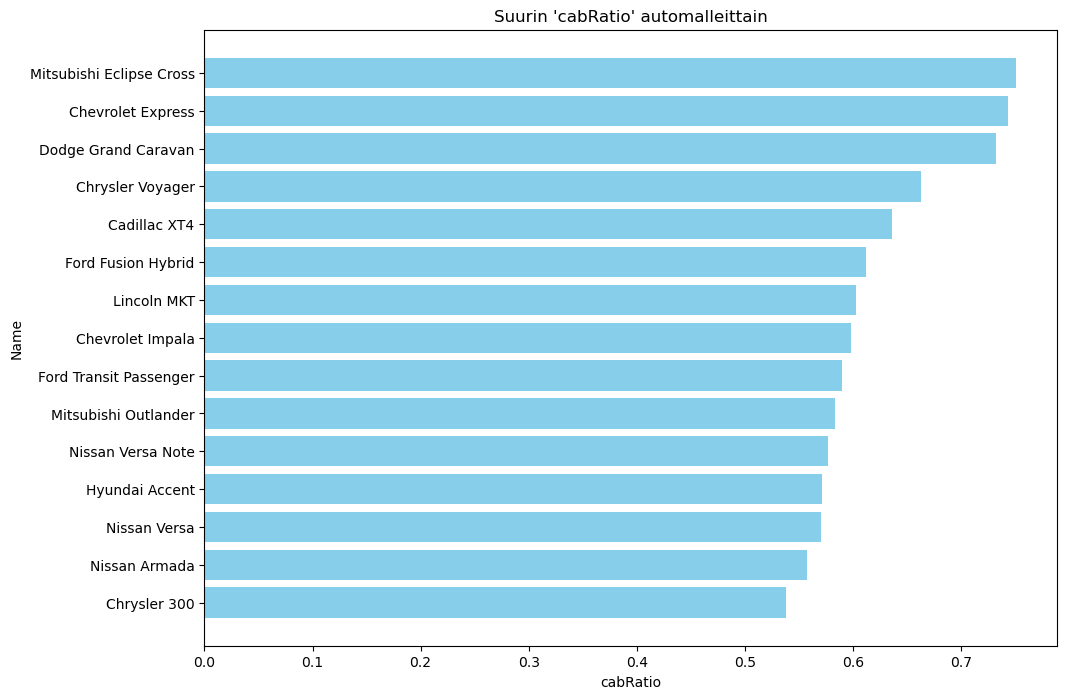

In [112]:
suurin_cr = tulos4_df.tail(15).reset_index().sort_values('cabRatio', ascending = True)
 
# Luodaan horisontaalinen pylväskaavio:
plt.figure(figsize=(11, 8))
bars = plt.barh(suurin_cr['name'], suurin_cr['cabRatio'], color='skyblue')

# Asetetaan otsikko ja selitteet:
plt.xlabel('cabRatio')
plt.ylabel('Name')
plt.title('Suurin \'cabRatio\' automalleittain')

plt.show()

Data vaikuttaa nyt siistimmältä, ja korrelaatiomatriisikin antaa toivoa tarkemmasta mallintamisesta. Tehdään siis tällä aineistolla aiempi lineaarinen regressiomalli uudestaan. 

## CRISP-DM vaihe 4: Mallinnus  

### Lineaarinen regressiomalli

In [113]:
#  Määritellään X- ja y-muuttujat: 
X3 = taksit2_df.drop(['price', 'has_accidents', 'make_name', 'model_name', 'name'], axis = 1)
y3 = taksit2_df['price']

X3.columns

Index(['daysonmarket', 'isCab', 'mileage', 'year', 'namelabel'], dtype='object')

In [114]:
# Jaetaan aineisto opetus- ja testausaineistoksi:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

# Skaalataan arvot:
ss3 = StandardScaler()
ss3.fit(X3_train)
X3_train = ss3.fit_transform(X3_train)
X3_test = ss3.transform(X3_test)


In [115]:
# Luodaan lineaarisen regression objekti:
regr3 = linear_model.LinearRegression()

# Sovitetaan malli opetusaineistoon:
regr3.fit(X3_train, y3_train)

# Ennustetaan testiaineiston arvoja:
y3_pred = regr3.predict(X3_test)

In [116]:
# Kertoimet:
print("Kertoimet: \n", regr3.coef_)

# Keskihajonta:
print("\nKeskihajonta: %.2f" % mean_squared_error(y3_test, y3_pred))

# Selitysaste:
print("\nSelitysaste (Rˆ2): %.2f" % r2_score(y3_test, y3_pred))


Kertoimet: 
 [ -279.43160906  -770.60032595 -2973.92851732  3578.26474356
 -1985.64181372]

Keskihajonta: 128896552.64

Selitysaste (Rˆ2): 0.23


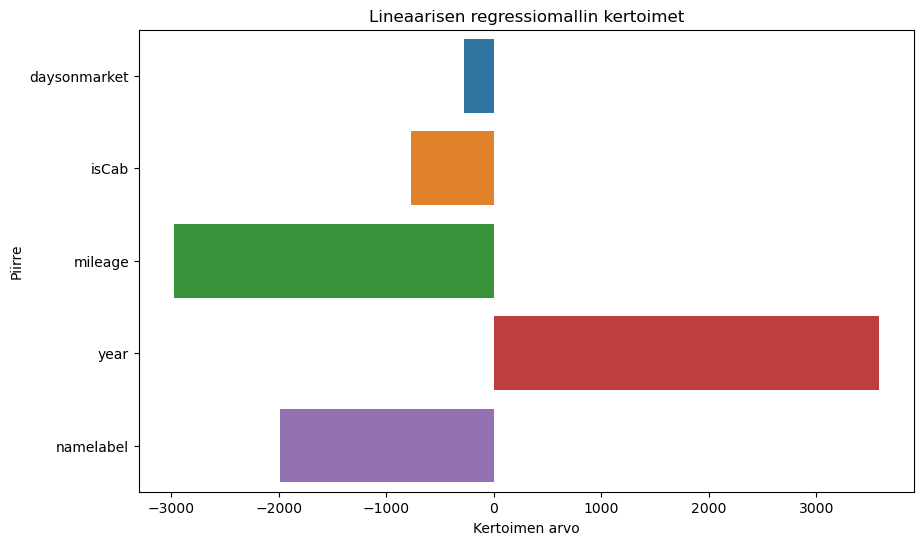

In [118]:
kertoimet3 = pd.DataFrame({
    'Piirre': ['daysonmarket', 'isCab', 'mileage', 'year', 'namelabel'],
    'Kerroin': regr3.coef_
})

# Kaavio kertoimista:
plt.figure(figsize=(10, 6))
sns.barplot(x='Kerroin', y='Piirre', data=kertoimet3, orient='h')
plt.title('Lineaarisen regressiomallin kertoimet')
plt.xlabel('Kertoimen arvo')
plt.ylabel('Piirre')

plt.show()

Vaikka kertoimista voitaisiin päätellä, että vuosimallilla on hintaan positiivinen, ja mittarilukemalla, taksikäytössä olemisella ja myyntiajan pituudella negatiivinen vaikutus hintaan, tämänkin mallin selitysaste Rˆ2 on niin heikko (0.23), ettei se todellisuudessa selitä hinnan vaihtelua. Aineiston hiominen ei parantanut mallin selitysastetta juuri lainkaan, joten voidaan epäillä, ettei lineaarinen malli sovellu tähän tehtävään lainkaan. 

Kokeillaan seuraavaksi, miten epälineaariset mallit päätöspuu ja satunnaismetsä selviytyvät samasta tehtävästä.   

### Päätöspuu 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
# Alustetaan ja koulutetaan luokittelija:
regr_dt = DecisionTreeRegressor(random_state=42)
regr_dt.fit(X3_train, y3_train)

# Ennustetaan testiaineiston arvoja:
y_pred_dt = regr_dt.predict(X3_test)


In [120]:
from sklearn.metrics import mean_squared_error, r2_score

# Arvioidaan mallia:
mse_dt = mean_squared_error(y3_test, y_pred_dt)
r2_dt = r2_score(y3_test, y_pred_dt)

print(f'Päätöspuun keskineliövirhe (MSE): {mse_dt}')
print(f'Päätöspuun selitysaste (Rˆ2): {r2_dt}') 


Päätöspuun keskineliövirhe (MSE): 193011100.1659888
Päätöspuun selitysaste (Rˆ2): -0.1464233498750882


Päätöspuun suuri keskineliövirhe ja negatiivinen selitysaste viittaavat siihen, ettei tämäkään malli toimi hyvin. Ennusteet eivät ole tarkkoja, eikä selittäjät muuttujat selitä hinnan vaihtelua hyvin.   

Kokeillaan seuraavaksi satunnaismetsämenetelmää. 

## Satunnaismetsä

In [121]:
from sklearn.ensemble import RandomForestRegressor

# Alustetaan ja koulutetaan luokittelija:
regr_rf = RandomForestRegressor(n_estimators=100, random_state=42)
regr_rf.fit(X3_train, y3_train)

# Ennustetaan testiaineiston arvoja: 
y_pred_rf = regr_rf.predict(X3_test)

In [122]:
# Arvioidaan mallia:
mse_rf = mean_squared_error(y3_test, y_pred_rf)
r2_rf = r2_score(y3_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Squared Error: 82659069.32751091
Random Forest - R-squared: 0.5090319309381325


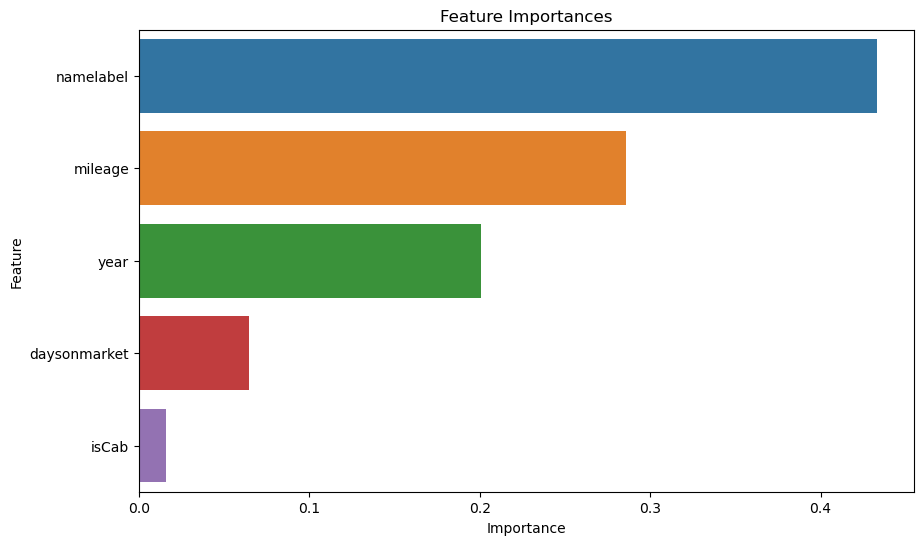

In [124]:
# Tutkitaan tärkeimpiä piirteitä:
feature_importances = pd.DataFrame({'Feature': X3.columns, 'Importance': regr_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Piirretään kaavio:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()